<a href="https://colab.research.google.com/github/Felipe-Pinto/python_para_exatas/blob/main/CN_Modulo6_A5_6_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Método dos Quadrados Mínimos

O método dos quadrados mínimos consiste em escolher os coeficientes $\alpha_1, \alpha_2, \cdots, \alpha_n$ de modo a encontrar uma função $\varphi(x)$ que minimize a seguinte função:

**Min** F($\alpha_1, \alpha_2, \cdots, \alpha_n$) = $\displaystyle \sum_{k=1}^{m} d_k^2 = \displaystyle \sum_{k=1}^{m} (f(x_k) - \varphi(x_k))^2$

onde:

$\varphi(x_k) = \alpha_1 g_1(x_k) + \alpha_2 g_2(x_k) + \cdots + \alpha_n g_n(x_k)$, $g_i(x_k), \forall i = 1,\cdots, n$ são funções $n$ contínuas em $[a,b]$, $d_k^2$ são os desvios quadráticos entre o valor tabelado $f(x_k)$ e o modelo proposto pela função $\varphi(x)$ no k-ésimo ponto tabelado $x_k$.

É importante frisar que os n pontos tabelados devem ser distintos e a representação geométrica para encontrar a reta que minimiza os erros entre os valores tabelados é representada pela Figura 1.

![](https://drive.google.com/uc?export=view&id=1M1iSigR_fpvq8YFBemgHH5J6Jyj_lCZ5)
Figura 1: Reta que minimiza o erro entre valores tabelados e o valor fornecido pelo modelo.

É importante ressaltar que neste caso: $\varphi(x) = a + bx$, tal que $g_1(x) = 1$, $g_2(x) = x$, $\alpha_1 = a$ e $\alpha_2 = b$.

A resolução deste problema consiste na obtenção e resolução de um sistema de equações associado, denominado **sistema normal A x = b**.


![](https://drive.google.com/uc?export=view&id=1ZxmzkRJgjH_6ZBNeeUW_P_hRmOsguhAa)


Um exemplo numérico que ilustra a obtenção do sistema linear associado à resolução do problema de quadrados mínimos é dado a seguir.

![](https://drive.google.com/uc?export=view&id=1AaAqw4OIF244YpjBl6kSJiUtbbKsr4Ei)

Aplicando-se a definição das funções **$g_1(x) = 1$**, **$g_2(x) = x$** e **$g_3(x) = x^2$**, o sistema será simplificado para:

![](https://drive.google.com/uc?export=view&id=1MNwv5si9JDb8oKGMpUSqdo5EptoWLzA8)

Esse sistema pode ser reagrupado para deixar em evidência os componentes da matriz **A** e do vetor **b** do **sistema normal** associado.


![](https://drive.google.com/uc?export=view&id=1dYUvNKPseOUSvxRikyQPL6YWrNpgwHBs)

O código dado a seguir fornece a melhor curva para qualquer polinômio de grau **dim-1**. Por exemplo, se **dim = 3**, então, serão usadas as funções $g_1(x) = 1$, $g_2(x) = x$ e $g_3(x) = x^2$. O código irá determinar quais são os valores $\alpha_1$, $\alpha_2$ e $\alpha_3$ associados que minimizam a soma do erro quadrático entre o valor tabelado $f(x)$ e $\varphi$ nos m pontos tabelados dados.


In [ ]:
import numpy as np

def sistemaAumentado(x,y,dim):
  n = len(x)
  A = np.empty((dim,dim))
  b = np.empty((dim))
  soma = []
  for i in range(0,2*dim+1):
    aux = 0
    for k in range(0,n):
      aux = aux + x[k]**i
    soma.append(aux)

  for i in range(0,dim):
    for j in range(i,dim):
      A[i,j] = soma[i+j]
      if (i != j):
        A[j,i] = A[i,j]


  b = []
  for i in range(0,dim):
    aux = 0
    for k in range(0,n):
      aux = aux + y[k]*(x[k]**(i))
    b.append(aux)

  return A, b

x = [-1.0, -0.75, -0.6,	-0.5,	-0.3, 0, 0.2, 0.4, 0.5,	0.7, 1]
y = [2.05, 1.153, 0.45,	0.4,	0.5, 0,	0.2, 0.6, 0.512, 1.2, 2.05]
A, b = sistemaAumentado(x,y,3)
print("A = ",A)
print("b = ",b)
coef = np.linalg.solve(A,b)
print("coef = ",coef)

A =  [[11.         -0.35        4.2025    ]
 [-0.35        4.2025     -0.249875  ]
 [ 4.2025     -0.249875    2.84640625]]
b =  [9.115, -0.10874999999999968, 5.8755625]
coef =  [0.09141166 0.09695181 1.93775251]


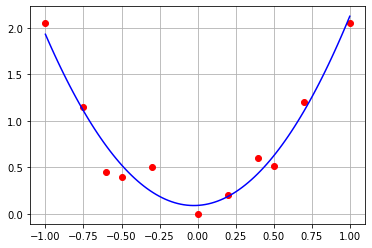

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(x, y,'ro')
data = np.linspace(min(x), max(x), 100)
# p = coe[0]*x^2 + coef[1]*x + coef[0]
c = coef[::-1].copy()
p = np.poly1d(c)
plt.plot(data, p(data),'b-')
plt.grid()
plt.show()


In [ ]:
import numpy as np

def sistemaAumentado(x,y,dim):
  n = len(x)
  A = np.empty((dim,dim))
  b = np.empty((dim))
  soma = []
  for i in range(0,dim+2):
    aux = 0
    for k in range(0,n):
      aux = aux + x[k]**i
    soma.append(aux)

  for i in range(0,dim):
    for j in range(i,dim):
      A[i,j] = soma[i+j]
      if (i != j):
        A[j,i] = A[i,j]


  b = []
  for i in range(0,dim):
    aux = 0
    for k in range(0,n):
      aux = aux + y[k]*(x[k]**(i))
    b.append(aux)

  return A, b

x  = [-1.0, -0.7, -0.4,	-0.1,	0.2, 0.5, 0.8, 1.0]
y  = [36.547, 17.264, 8.155, 3.852, 1.820, 0.860, 0.406, 0.246]
ly = np.log(y)
A, b = sistemaAumentado(x,ly,2)
print("A = ",A)
print("b = ",b)
coef = np.linalg.solve(A,b)
print("coef = ",coef)

A =  [[8.   0.3 ]
 [0.3  3.59]]
b =  [8.038633990932304, -8.646136816471202]
coef =  [ 1.09858669 -2.50019856]


# 2. Caso Não-Linear

![](https://drive.google.com/uc?export=view&id=1K4PnkKMtg2KU4aIUBXvfMoLoj0LbxT7R)


![](https://drive.google.com/uc?export=view&id=1-WhHfDhU_IYbn0Qi5DIAWPX2uq3cSyf8)


![](https://drive.google.com/uc?export=view&id=1h2jEyMG5oxFpHp14uPnJilxWqyk8Xv00)


![](https://drive.google.com/uc?export=view&id=1LKUVzpRFLT4RLV6wrg_w15uQdSJFb_q4)



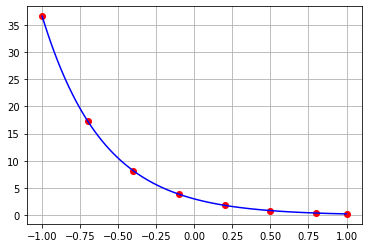

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def p(coef,x):
   y = np.exp(coef[0])*np.exp(coef[1]*x)
   return y

plt.plot(x, y,'ro')
data = np.linspace(min(x), max(x), 100)
plt.plot(data, p(coef,data),'b-')
plt.grid()
plt.show()